# Problem Statement:



Given profiles representing fictional customers from an e-commerce company. The profiles contain information about the customer, their orders, their transactions ,what payment methods they used and whether the customer is fraudulent or not. We need to predict the given customer is fraudulent or not based on the above factors

##The data given below represents fictional customers from an e-commerce website

The data contain information about the customerEmail,orders,transaction they have made,what payment method they have used,through which card the payment has been done and whether the customer is fraudulent or not 

1)The first thing is loading the dataset 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data1 = pd.read_csv('Customer_DF.csv')
data2 = pd.read_csv('cust_transaction_details.csv')

In [3]:
#this code is just to make the copy of the dataset 
data_copy_1 = pd.read_csv('Customer_DF.csv')
data_copy_2 = pd.read_csv('cust_transaction_details.csv')

In [4]:
data1.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [5]:
data2.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


Checking whether if they are some null values

In [6]:
data1.isnull().sum()

Unnamed: 0                0
customerEmail             0
customerPhone             0
customerDevice            0
customerIPAddress         0
customerBillingAddress    0
No_Transactions           0
No_Orders                 0
No_Payments               0
Fraud                     0
dtype: int64

In [7]:
data2.isnull().sum()

Unnamed: 0                          0
customerEmail                       0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

Printing the columns of both the table

In [8]:
data1.columns

Index(['Unnamed: 0', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'No_Transactions',
       'No_Orders', 'No_Payments', 'Fraud'],
      dtype='object')

In [9]:
data2.columns

Index(['Unnamed: 0', 'customerEmail', 'transactionId', 'orderId',
       'paymentMethodId', 'paymentMethodRegistrationFailure',
       'paymentMethodType', 'paymentMethodProvider', 'transactionAmount',
       'transactionFailed', 'orderState'],
      dtype='object')

Shape of the datasets

In [10]:
data1.shape

(168, 10)

In [11]:
data2.shape

(623, 11)

In [12]:
print('total customers records',data1.shape[0], 'and total unique customers',len(data1.customerEmail.unique())) 

total customers records 168 and total unique customers 161


Duplicates customersEmail ID's are....

In [13]:
data1[data1['customerEmail'].duplicated()]

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
40,40,johnlowery@gmail.com,737-377-9701x577,jz66ap43id2y35ivfqa5,6c21:ac1d:2089:68fa:abb7:8c00:525f:6588,"08238 Kyle Squares Suite 893\nMillermouth, IN ...",0,0,1,True
45,45,johnlowery@gmail.com,+16(4)9016414340,cdx178qymd6vy77nm4x3,222.79.159.140,"77711 Pamela Ridge\nNew Kayla, IL 27182",3,2,1,True
65,65,johnlowery@gmail.com,4712252182,311kdz4c1210iixltk2j,42b3:df19:86fe:abd9:dafe:f6c1:eb76:c72,"11704 Andrew Villages Apt. 035\nJamesfurt, OR ...",7,5,1,True
79,79,johnlowery@gmail.com,1-820-539-4726x993,2in0fh7lep289n8dcbdz,163.128.139.42,"814 Wagner Union\nAshleymouth, HI 35617",2,2,1,True
133,133,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,True
155,155,johnlowery@gmail.com,076-099-0630x72770,6qy6oa3nqutsyyxzc54c,f259:657f:f329:2fca:c06c:8b57:d6ac:2380,"687 Rogers Bridge Suite 780\nValdezburgh, IN 2...",6,5,3,True
165,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True


We see that all the records that are duplicated are fraudulent

So now our job is to remove all the duplicate entries from the dataset

In [14]:
data2=data2.drop(["transactionId","transactionId","paymentMethodId","orderId","Unnamed: 0"],axis=1)

In [15]:
#filtering the email if their is "." present in them
data2["customerEmail"]=data2.apply(lambda x:x.customerEmail if("." in x.customerEmail) else "f",axis=1)

In [16]:
#setting customerEmail as the index of the dataframe
data2 = data2.set_index("customerEmail")

In [17]:
#dropping the email which does not have '.' in them
data2=data2.drop("f",axis=0)

In [18]:
#taking out the mean of the customerEmail to avoid duplicates
n1=data2.groupby("customerEmail")["paymentMethodRegistrationFailure"].mean().astype(int)

In [19]:
n2=data2.groupby("customerEmail")["transactionAmount"].mean().astype(int)
n3=data2.groupby("customerEmail")["transactionFailed"].mean().astype(int)

In [20]:
data2=data2.drop(["transactionFailed","transactionAmount","paymentMethodRegistrationFailure"],axis=1)

In [21]:
data2=data2.drop(["paymentMethodProvider"],axis=1)

In [22]:
#creating dummy variables for the dataset
data2= pd.get_dummies(data2)
data2

,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,orderState_failed,orderState_fulfilled,orderState_pending
customerEmail,,,,,,,
josephhoward@yahoo.com,0,0,1,0,0,0,1
josephhoward@yahoo.com,0,0,1,0,0,1,0
evansjeffery@yahoo.com,0,1,0,0,0,1,0
evansjeffery@yahoo.com,0,1,0,0,0,1,0
evansjeffery@yahoo.com,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...
dawn05@tucker-brown.com,0,0,1,0,0,1,0
dawn05@tucker-brown.com,0,0,1,0,0,1,0
dawn05@tucker-brown.com,0,0,0,1,0,1,0


In [23]:
m1=data2.groupby("customerEmail")["orderState_failed"].mean().astype(int)
m2=data2.groupby("customerEmail")["orderState_fulfilled"].mean().astype(int)
m3=data2.groupby("customerEmail")["orderState_pending"].mean().astype(int)

In [24]:
l1=data2.groupby("customerEmail")["paymentMethodType_card"].mean().astype(int)
l2=data2.groupby("customerEmail")["paymentMethodType_paypal"].mean().astype(int)
l3=data2.groupby("customerEmail")["paymentMethodType_apple pay"].mean().astype(int)
l4=data2.groupby("customerEmail")["paymentMethodType_bitcoin"].mean().astype(int)

In [25]:
#concatenating the variables after removing duplicates
nresult = pd.concat([m1,m2,m3,l1,l2,l3,l4,n1,n2,n3], axis=1, join='inner')

In [26]:
data1=data1.drop(["customerPhone","customerDevice","customerIPAddress","customerBillingAddress","Unnamed: 0"],axis=1)

In [27]:
#converting the target variable from bool to int for the creation of dummy variable
data1['Fraud'] = data1['Fraud'].astype(int)

In [28]:
#merging both the datasets into single object called result
result = pd.merge(data1,nresult, on='customerEmail')

In [29]:
result.isnull().sum()

customerEmail                       0
No_Transactions                     0
No_Orders                           0
No_Payments                         0
Fraud                               0
orderState_failed                   0
orderState_fulfilled                0
orderState_pending                  0
paymentMethodType_card              0
paymentMethodType_paypal            0
paymentMethodType_apple pay         0
paymentMethodType_bitcoin           0
paymentMethodRegistrationFailure    0
transactionAmount                   0
transactionFailed                   0
dtype: int64

In [30]:
#unique email id's in result dataset
len(result["customerEmail"].unique())

133

In [31]:
#dropping the email id as it is of no use now for simplicity
result=result.drop(["customerEmail"],axis=1)

In [32]:
result.columns

Index(['No_Transactions', 'No_Orders', 'No_Payments', 'Fraud',
       'orderState_failed', 'orderState_fulfilled', 'orderState_pending',
       'paymentMethodType_card', 'paymentMethodType_paypal',
       'paymentMethodType_apple pay', 'paymentMethodType_bitcoin',
       'paymentMethodRegistrationFailure', 'transactionAmount',
       'transactionFailed'],
      dtype='object')

In [33]:
#creating the dummies for the merged dataset
result2= pd.get_dummies(result)
result2

,No_Transactions,No_Orders,No_Payments,Fraud,orderState_failed,orderState_fulfilled,orderState_pending,paymentMethodType_card,paymentMethodType_paypal,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
0,2,2,1,0,0,0,0,1,0,0,0,1,22,0
1,3,3,7,1,0,1,0,0,0,0,1,0,37,0
2,5,3,2,0,0,0,0,1,0,0,0,0,26,0
3,3,3,1,0,0,1,0,1,0,0,0,0,28,0
4,7,7,6,1,0,0,0,0,0,0,0,0,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,3,2,1,0,0,1,0,0,0,1,0,0,36,0
136,3,3,1,1,0,0,0,1,0,0,0,0,42,0
137,6,5,3,1,0,1,0,1,0,0,0,0,24,0
138,8,6,6,1,0,0,0,0,0,0,0,0,47,0


Now exploring the data and analysing it

In [34]:
#maximum number of transaction done by the customer
data1[data1['No_Transactions']==data1['No_Transactions'].max()]

,customerEmail,No_Transactions,No_Orders,No_Payments,Fraud
143,mitchellgriffith@yahoo.com,15,3,1,0


In [35]:
#maximum number of orders done by the customer
data1[data1['No_Orders']==data1['No_Orders'].max()]

,customerEmail,No_Transactions,No_Orders,No_Payments,Fraud
84,lleonard@turner-fleming.com,11,8,1,1
97,vmiller@hotmail.com,10,8,1,1
98,david45@gmail.com,10,8,5,1
103,tmcpherson@wright.com,13,8,1,1


In [36]:
#maximum number of payments done by the customer
data1[data1['No_Payments']==data1['No_Payments'].max()]

,customerEmail,No_Transactions,No_Orders,No_Payments,Fraud
68,cathy42@gibson.com,3,3,15,1


In [37]:
data_copy_2['paymentMethodRegistrationFailure'].value_counts()

0    541
1     82
Name: paymentMethodRegistrationFailure, dtype: int64

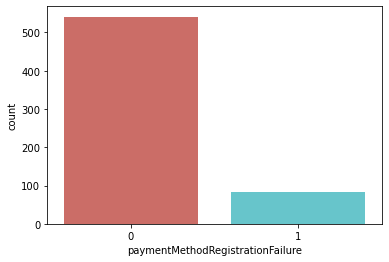

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='paymentMethodRegistrationFailure',data=data_copy_2,palette='hls')
plt.show()

Count of Payment method Registration Failure occ

INFERENCE --> There is a very less probability of payment to fail

In [39]:
data_copy_2['paymentMethodType'].value_counts()

card         479
apple pay     49
paypal        48
bitcoin       47
Name: paymentMethodType, dtype: int64

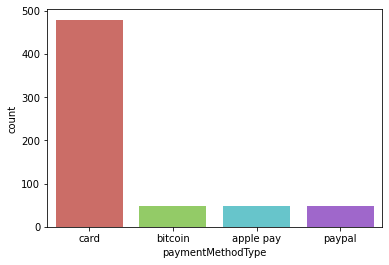

In [40]:
sns.countplot(x='paymentMethodType',data=data_copy_2,palette='hls')
plt.show()

PREFERRED PAYMENT METHOD

INFERENCE --> People prefer Card over other payment methods types

In [41]:
data_copy_2['paymentMethodProvider'].value_counts()

JCB 16 digit                   118
VISA 16 digit                   96
Maestro                         69
Voyager                         61
Diners Club / Carte Blanche     58
VISA 13 digit                   58
JCB 15 digit                    45
American Express                45
Discover                        41
Mastercard                      32
Name: paymentMethodProvider, dtype: int64

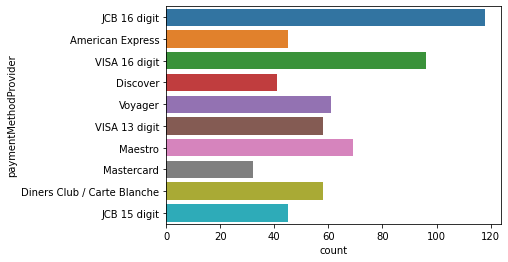

In [42]:
sns.countplot(y="paymentMethodProvider",data=data_copy_2)

Payment Method Provider 

INFERENCE --> JCB 16 DIGIT is widely used followed by VISA 16 DIGIT and rest 

In [43]:
data_copy_2['transactionFailed'].value_counts()

0    455
1    168
Name: transactionFailed, dtype: int64

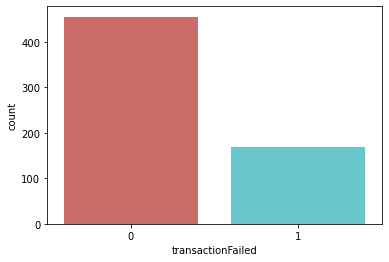

In [44]:
sns.countplot(x='transactionFailed',data=data_copy_2,orient='vertical',palette='hls')
plt.show()

transaction failed

INFERENCE --> after the payment is completed , the probability of transaction to fail is low

In [45]:
data_copy_2['orderState'].value_counts()

fulfilled    516
failed        63
pending       44
Name: orderState, dtype: int64

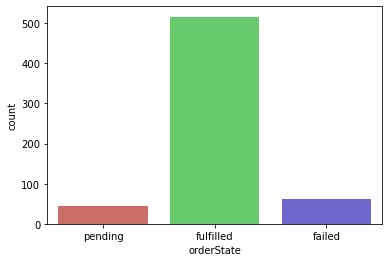

In [46]:
sns.countplot(x='orderState',data=data_copy_2,orient='vertical',palette='hls')
plt.show()

Order State

INFERENCE --> it is found out that the most of the orders were fullfilled

In [47]:
result['Fraud'].value_counts()

0    87
1    53
Name: Fraud, dtype: int64

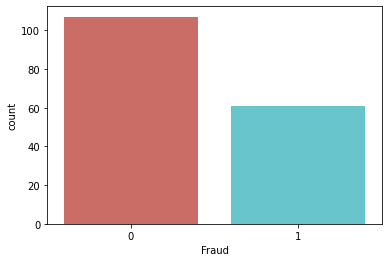

In [48]:
sns.countplot(x='Fraud',data=data1,orient='vertical',palette='hls')
plt.show()

FRAUD 

INFERENCE --> it is seen that the cases aof fraud is neaarly half of those that are not fraud

In [49]:
result

,No_Transactions,No_Orders,No_Payments,Fraud,orderState_failed,orderState_fulfilled,orderState_pending,paymentMethodType_card,paymentMethodType_paypal,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
0,2,2,1,0,0,0,0,1,0,0,0,1,22,0
1,3,3,7,1,0,1,0,0,0,0,1,0,37,0
2,5,3,2,0,0,0,0,1,0,0,0,0,26,0
3,3,3,1,0,0,1,0,1,0,0,0,0,28,0
4,7,7,6,1,0,0,0,0,0,0,0,0,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,3,2,1,0,0,1,0,0,0,1,0,0,36,0
136,3,3,1,1,0,0,0,1,0,0,0,0,42,0
137,6,5,3,1,0,1,0,1,0,0,0,0,24,0
138,8,6,6,1,0,0,0,0,0,0,0,0,47,0


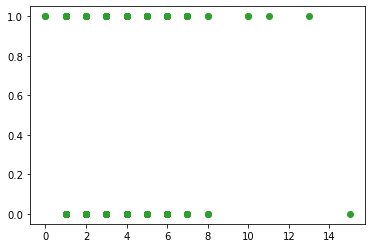

In [50]:
#number of transaction that went fraud and not fraud
plt.scatter(result['No_Transactions'],result['Fraud'],color='#2ca02c')

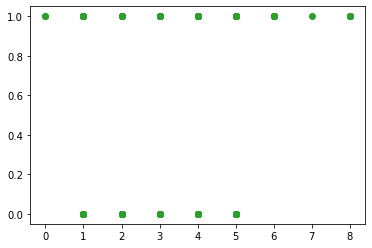

In [51]:
#number of orders that went fraud and not fraud
plt.scatter(result['No_Orders'],result['Fraud'],color='#2ca02c')

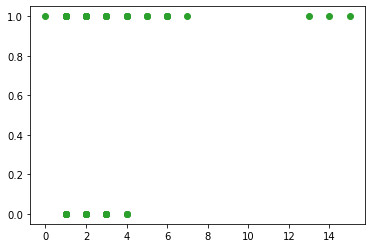

In [52]:
#number of payments that went fraud and not fraud
plt.scatter(result['No_Payments'],result['Fraud'],color='#2ca02c')

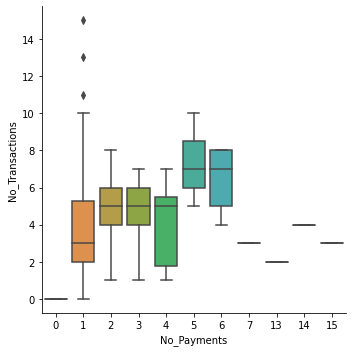

In [53]:
sns.catplot(x="No_Payments",y="No_Transactions",data=result,kind="box")

INFERENCE --> although there is no particular trend , but it seems that as the no.of payments increase the no,of transactions tend to decrease 

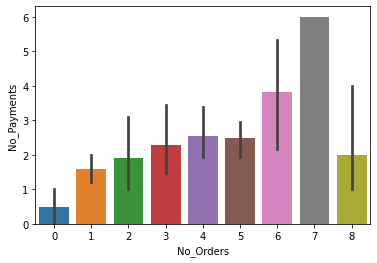

In [54]:
sns.barplot(y="No_Payments",x="No_Orders",data=result)

INFERENCE --> as the no,of orders increase the no.of payments tend to increase

In [55]:
data1[data1['No_Payments']==0]

,customerEmail,No_Transactions,No_Orders,No_Payments,Fraud
34,zbennett@frazier.com,0,0,0,0
38,xwang@white.com,0,0,0,0
44,gsimpson@cox.org,0,0,0,0
47,johnsonjennifer@yahoo.com,0,0,0,0
54,zthomas@gmail.com,0,0,0,0
70,brockmatthew@hotmail.com,0,0,0,0
125,wbeltran@ramirez-shaffer.com,0,0,0,0
133,johnlowery@gmail.com,0,0,0,1
137,stephanie21@reyes-spencer.biz,0,0,0,0
139,bhorne@fuller-nelson.com,0,0,0,0


In [56]:
#No. number of fullfilled orders
len(result[result['orderState_fulfilled'] == 1])

75

In [57]:
#No. number of pending orders
len(result[result['orderState_pending'] == 1])

2

In [58]:
#No. number of failed orders
len(result[result['orderState_failed'] == 1])

0

Text(0, 0.5, 'Fraud')

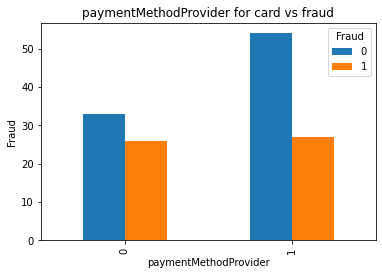

In [59]:
%matplotlib inline
pd.crosstab(result['paymentMethodType_card'],result['Fraud']).plot(kind='bar')
plt.title('paymentMethodProvider for card vs fraud')
plt.xlabel('paymentMethodProvider')
plt.ylabel('Fraud')

INFERENCE --> when the payment method is not card then it is seen that the not fraud and fraud cases are nearly same and when card is used the non fraud case is higher than the fraud case

Text(0, 0.5, 'Fraud')

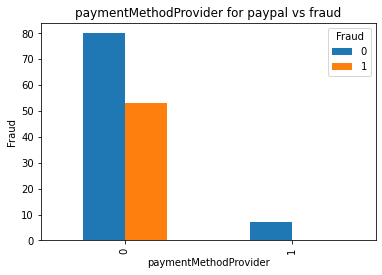

In [60]:
%matplotlib inline
pd.crosstab(result['paymentMethodType_paypal'],result['Fraud']).plot(kind='bar')
plt.title('paymentMethodProvider for paypal vs fraud')
plt.xlabel('paymentMethodProvider')
plt.ylabel('Fraud')

INFERENCE --> when the payment method is not paypal then the cases of not fraud is higher than cases of fraud and when paypal is used there is no case of fraud at all

Text(0, 0.5, 'Fraud')

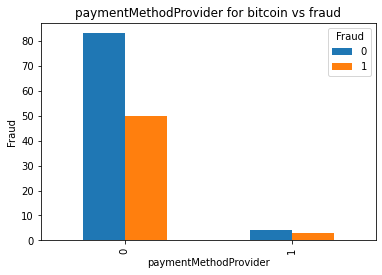

In [61]:
%matplotlib inline
pd.crosstab(result['paymentMethodType_bitcoin'],result['Fraud']).plot(kind='bar')
plt.title('paymentMethodProvider for bitcoin vs fraud')
plt.xlabel('paymentMethodProvider')
plt.ylabel('Fraud')

INFERENCE --> when the payment type is not bitcoin it is found that the cases of non fraud is higher than the cases of fraud and when bitcoin is used it is found that fraud and non fraud cases is almost same

Till Now we have done some EDA for our datasets
Now we have to construct our model to predict if the customer if fraudulent or not

In [62]:
result.describe(include='all')

,No_Transactions,No_Orders,No_Payments,Fraud,orderState_failed,orderState_fulfilled,orderState_pending,paymentMethodType_card,paymentMethodType_paypal,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,140.000000,140.000000,140.000000,140.000000,140.0,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,4.321429,3.335714,2.271429,0.378571,0.0,0.535714,0.014286,0.578571,0.050000,0.050000,0.050000,0.078571,34.550000,0.021429
std,2.496812,1.711622,2.201513,0.486773,0.0,0.500514,0.119092,0.495561,0.218728,0.218728,0.218728,0.270035,29.343494,0.145328
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,2.000000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000
50%,4.000000,3.000000,2.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.500000,0.000000
75%,6.000000,4.000000,3.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000
max,15.000000,8.000000,15.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,353.000000,1.000000


In [63]:
#creating dependent and independent variables
features = result2.drop('Fraud',axis=1) #->independent variables
labels = result2['Fraud'] #->dependent variable

In [64]:
#splitting the data into training and testing
#and performing Logistic Regression and fitting the training dataset in the Logistic model

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.20,random_state=0)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
#predicating the output from the test data
ypred = lr.predict(X_test)

ypred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1])

In [66]:
from sklearn.metrics import confusion_matrix

#creating a confusion matrix to check if the variable is predicated correctly or not
confusion_matrix(y_test,ypred)

array([[15,  2],
       [ 5,  6]], dtype=int64)

Confusion matrix, without normalization
[[15  2]
 [ 5  6]]


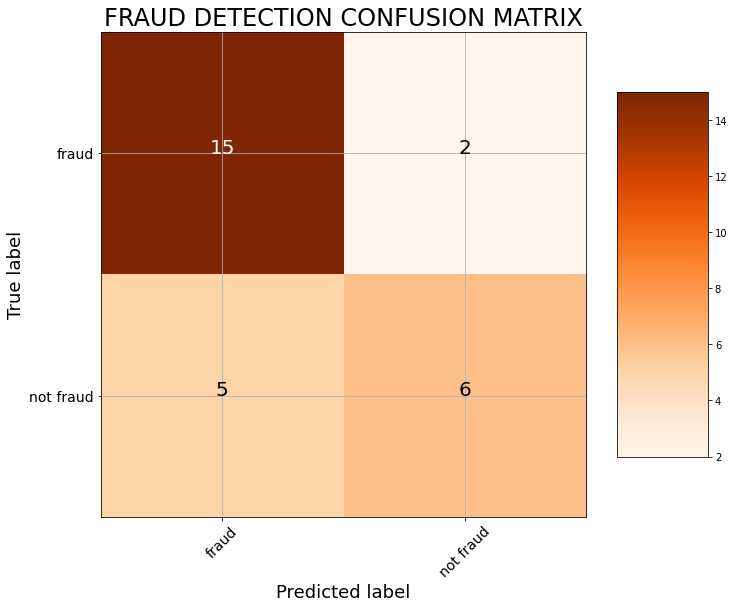

In [67]:
#normalizing the data and plotting the confusion matrix

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

cm = confusion_matrix(y_test, ypred)
plot_confusion_matrix(cm, classes = ['fraud', 'not fraud'],
                      title = 'FRAUD DETECTION CONFUSION MATRIX')

In [68]:
#finding out the accuracy_score for the model
#the below accuracy for the model is 68%,hyperparameters are yet to be applied
 
from sklearn.metrics import accuracy_score

print("Logistic regression")
accuracy_score(y_test,ypred) * 100

Logistic regression


75.0

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        17
           1       0.75      0.55      0.63        11

    accuracy                           0.75        28
   macro avg       0.75      0.71      0.72        28
weighted avg       0.75      0.75      0.74        28



In [70]:
#basically in the below code we are performing pipelining in the model itself will Normalize the data and perform PCA

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
pca = decomposition.PCA(n_components=2)
logistic = linear_model.LogisticRegression()

In [71]:
pipe = Pipeline(steps=[('sc', sc),
                        ('pca', pca),
                        ('logistic', logistic)])

In [72]:
n_components = list(range(1,features.shape[1]+1,1))
 # Create a list of values of the regularization parameter
C = np.logspace(-4, 4, 15)
 # Create a list of options for the regularization penalty
penalty = ['l1', 'l2']
# Create a dictionary of all the parameter options 
#  accessing the parameters of steps of a pipeline by using '__’
parameters = dict(pca__n_components=n_components,
                    logistic__C=C,
                    logistic__penalty=penalty)

In [73]:
clf = GridSearchCV(pipe, parameters,verbose = True,n_jobs=-1,scoring='accuracy')

# Fit the grid search
clf.fit(features, labels)
print('Best Penalty:', clf.best_estimator_.get_params()['logistic__penalty'])
print('Best C:', clf.best_estimator_.get_params()['logistic__C'])
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])

Fitting 5 folds for each of 390 candidates, totalling 1950 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 1456 tasks      | elapsed:   11.7s


Best Penalty: l2
Best C: 2682.695795279722
Best Number Of Components: 12


[Parallel(n_jobs=-1)]: Done 1950 out of 1950 | elapsed:   14.0s finished


In [74]:
#this will return the best parameters that are required for our model
clf.best_params_

{'logistic__C': 2682.695795279722,
 'logistic__penalty': 'l2',
 'pca__n_components': 12}

In [75]:
#this will return the mean accuracy of the model
clf.best_score_

0.75

In [76]:
clf.best_estimator_

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=12,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=2682.695795279722, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='lbfgs',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [77]:
clf.best_estimator_.get_params()['logistic']

LogisticRegression(C=2682.695795279722, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
#here cross_val_score will split the whole data into training and testing and perforn cross validations
cross_val = cross_val_score(clf,features,labels,cv=3,scoring='accuracy',n_jobs=-1)

In [79]:
#this will return the accuracy of each dataset that was splitted on the basics of 'cv' value which is 3
cross_val * 100

array([72.34042553, 82.9787234 , 76.08695652])

In [80]:
print('the mean accuracy of our model is',(cross_val * 100).mean())

the mean accuracy of our model is 77.13536848596978


In [81]:
print('the maximum accuracy of our model is',max(cross_val * 100))

the maximum accuracy of our model is 82.97872340425532


# INFERENCES

* There is a very less probability of payment to fail
* People prefer Card over other payment methods types
* JCB 16 DIGIT is widely used followed by VISA 16 DIGIT and rest 
* After the payment is completed , the probability of transaction to fail is low
* It is found out that the most of the orders were fullfilled
* It is seen that the cases of fraud is nearly half of those that are not fraud
* It seems that as the no.of payments increase the no,of transactions tend to decrease 
* As the no.of orders increase the no.of payments tend to increase
* When the payment method is not card then it is seen that the not fraud and fraud cases are nearly same and when card is used   the non fraud case is higher than the fraud case
* When the payment method is not paypal then the cases of not fraud is higher than cases of fraud and when paypal is used there   is no case of fraud at all
* When the payment type is not bitcoin it is found that the cases of non fraud is higher than the cases of fraud and             when bitcoin is used it is found that fraud and non fraud cases is almost same





#  Model_Selection

* Initially , we decided to use Logistic Regression as it seems to appear as a binary problem and achieved an accuracy of 75%
* 
* Implemented a pipeline such that it will Normalize the data and perform PCA
* 
* Applied CrossValidation and fitting the model via GridSearch
* 
* The mean accuracy of our model is 77.13536848596978 %
  The highest accuracy of our model is 82.97872340425532 %